In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## The problem

### Create the training data.

In [3]:
nx = 20
nt = 20
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [4]:
eq_name = 'diff1d_sine'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

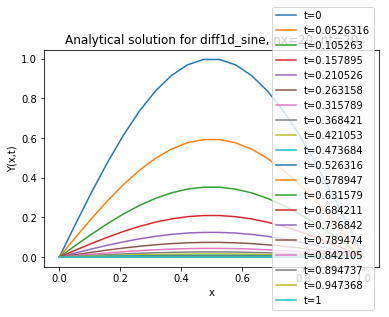

In [5]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
plt.legend(loc='right')
plt.title('Analytical solution for %s, nx=%d, nt=%d' % (eq_name, nx, nt));

## BFGS (default)

In [6]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

         Current function value: 0.188628
         Iterations: 1958
         Function evaluations: 2107
         Gradient evaluations: 2095
17min 9s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 0.18862801888078282
 hess_inv: array([[ 8.91854467e-01,  2.16289425e-01,  9.19001835e-01, ...,
         6.52935311e+02, -1.22217200e+03, -4.13502599e+02],
       [ 2.15361039e-01,  2.01349353e-01,  2.18443693e-01, ...,
         7.11994863e+02, -1.33814175e+03, -4.53099752e+02],
       [ 9.19004751e-01,  2.19405405e-01,  9.47243483e-01, ...,
         6.58747318e+02, -1.23287828e+03, -4.17101392e+02],
       ...,
       [ 6.48383678e+02,  7.12297009e+02,  6.54049137e+02, ...,
         3.50346497e+06, -6.58726627e+06, -2.23084738e+06],
       [-1.21361740e+03, -1.33871389e+03, -1.22404834e+03, ...,
        -6.58727987e+06,  1.23855570e+07,  4.19451083e+06],
       [-4.10608076e+02, -4.53302186e+02, -4.14113698e+02, ...,
        -2.23089027e+06,  4.19458280e+06,  1.42055102e+0

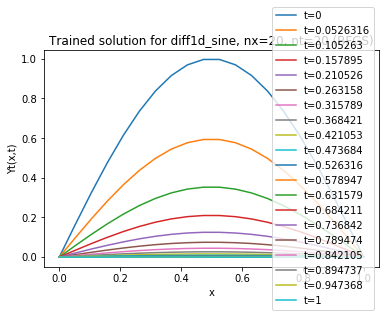

In [7]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s, nx=%d, nt=%d (%s)' % (eq_name, nx, nt, trainalg));

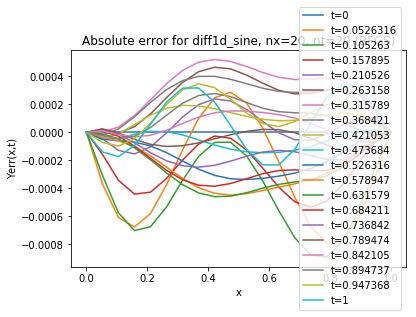

In [8]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s, nx=%d, nt=%d (%s)' % (eq_name, nx, nt, trainalg));